In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/final-data/__results__.html
/kaggle/input/final-data/__notebook__.ipynb
/kaggle/input/final-data/__output__.json
/kaggle/input/final-data/custom.css
/kaggle/input/final-data/phase2/user_train_phase_2_test.csv
/kaggle/input/final-data/phase2/user_train_phase_2.csv
/kaggle/input/final-data/phase2/user_train_phase_2_train.csv
/kaggle/input/final-data/__results___files/__results___144_0.png
/kaggle/input/final-data/__results___files/__results___76_0.png
/kaggle/input/final-data/__results___files/__results___149_0.png
/kaggle/input/final-data/__results___files/__results___31_0.png
/kaggle/input/final-data/__results___files/__results___66_0.png
/kaggle/input/final-data/__results___files/__results___59_0.png
/kaggle/input/final-data/__results___files/__results___69_0.png
/kaggle/input/final-data/__results___files/__results___27_0.png
/kaggle/input/final-data/__results___files/__results___81_0.png
/kaggle/input/final-data/__results___files/__results___71_0.png
/kaggle/input/final

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (f1_score, precision_score, recall_score, accuracy_score, 
                             roc_auc_score, roc_curve, confusion_matrix)
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.calibration import CalibratedClassifierCV  
from eli5.sklearn import PermutationImportance  

from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import (
    f1_score, precision_score, recall_score, accuracy_score,
    roc_auc_score, confusion_matrix, roc_curve
)

from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings("ignore")

In [9]:
def load_data(phase):
    # Đọc file CSV đầy đủ (dùng cho cross-validation)
    phase_ = phase[:-1] + '_' + phase[-1]
    df = pd.read_csv(f"/kaggle/input/final-data/{phase}/user_train_{phase_}.csv")
    
    # In thông tin chung về dữ liệu
    print(df.info())

    # Map trường 'school' thành số lượng xuất hiện
    count_map = df['school'].value_counts().to_dict()
    df['school'] = df['school'].map(count_map)

    # Fill nan = 0
    df = df.fillna(0)

    # Loại bỏ các cột không cần thiết
    columns_to_drop = ['course_id', 'user_id', 'total_score', 'label']
    df = df.drop(columns=columns_to_drop, axis=1)

    # Lấy nhãn (target) từ cột 'label_encoded'
    y = df.pop("label_encoded")
    X = df

    return X, y


In [10]:
catboost_config = {
    'rsm':0.8,
    'iterations': 400,
    'learning_rate': 0.15,
    'depth': 6,
    'l2_leaf_reg': 3,
    'border_count':64
}


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108122 entries, 0 to 108121
Data columns (total 68 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              108122 non-null  object 
 1   school                               46058 non-null   object 
 2   course_id                            108122 non-null  object 
 3   encoded_field_sum                    108122 non-null  int64  
 4   start_year                           108122 non-null  float64
 5   start_month                          108122 non-null  float64
 6   end_year                             108122 non-null  float64
 7   end_month                            108122 non-null  float64
 8   user_year                            108122 non-null  float64
 9   user_month                           108122 non-null  float64
 10  video_count                          108122 non-null  int64  
 11  exercise_coun

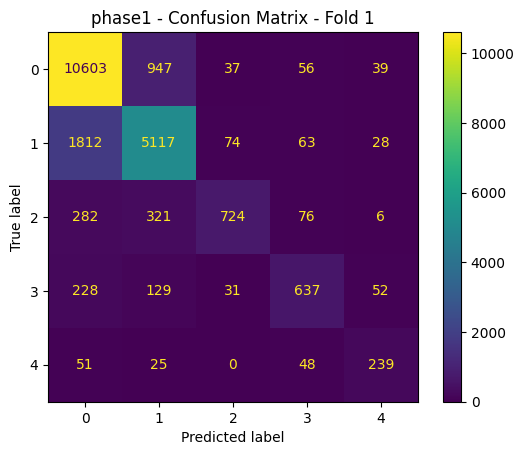


Fold 2:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     11682
           1       0.79      0.72      0.75      7094
           2       0.79      0.52      0.63      1409
           3       0.74      0.64      0.69      1076
           4       0.66      0.67      0.67       364

    accuracy                           0.80     21625
   macro avg       0.76      0.69      0.72     21625
weighted avg       0.80      0.80      0.80     21625



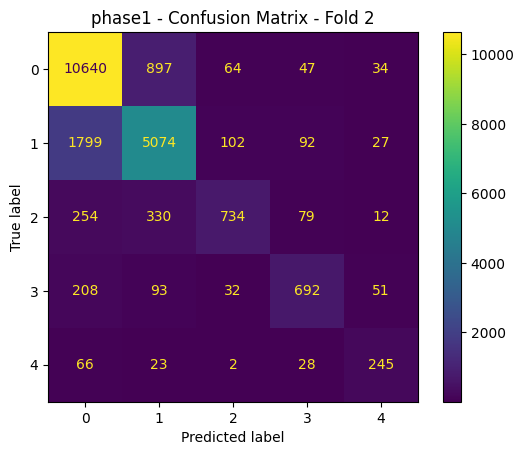


Fold 3:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86     11681
           1       0.78      0.74      0.76      7095
           2       0.81      0.50      0.62      1409
           3       0.73      0.61      0.66      1076
           4       0.66      0.75      0.70       363

    accuracy                           0.80     21624
   macro avg       0.76      0.70      0.72     21624
weighted avg       0.80      0.80      0.80     21624



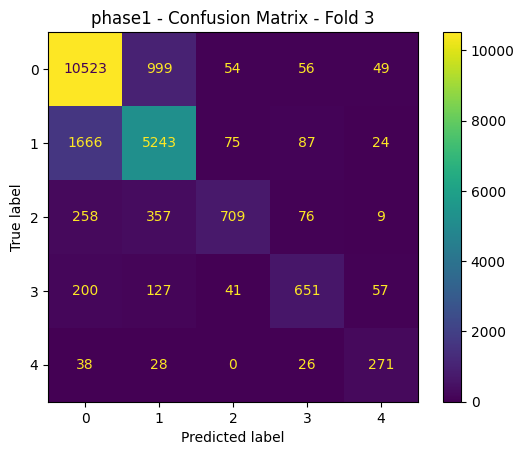


Fold 4:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87     11681
           1       0.79      0.73      0.76      7094
           2       0.79      0.51      0.62      1410
           3       0.74      0.61      0.67      1076
           4       0.65      0.67      0.66       363

    accuracy                           0.81     21624
   macro avg       0.76      0.69      0.72     21624
weighted avg       0.80      0.81      0.80     21624



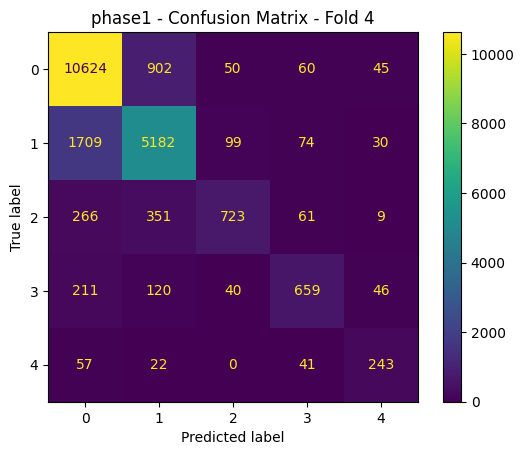


Fold 5:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     11681
           1       0.78      0.72      0.75      7094
           2       0.81      0.50      0.61      1410
           3       0.70      0.64      0.67      1076
           4       0.67      0.72      0.70       363

    accuracy                           0.80     21624
   macro avg       0.76      0.70      0.72     21624
weighted avg       0.80      0.80      0.80     21624



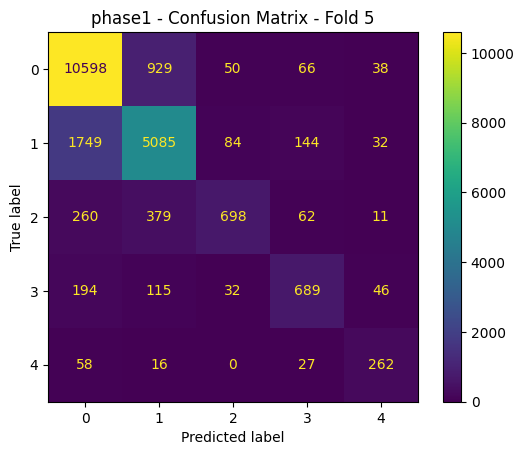

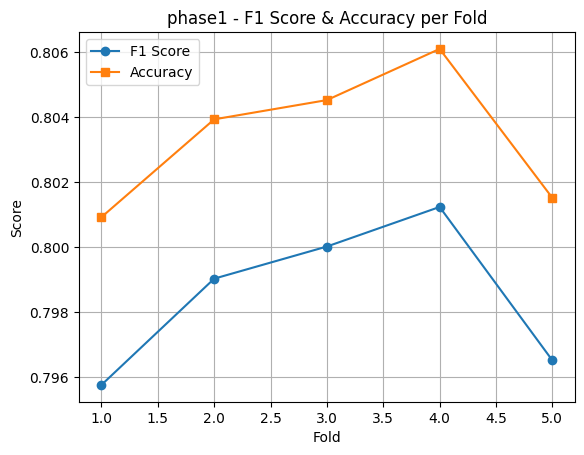


phase1 - Average F1 Score: 0.7985
phase1 - Average Accuracy: 0.8034
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101600 entries, 0 to 101599
Columns: 111 entries, user_id to label_encoded
dtypes: float64(99), int64(8), object(4)
memory usage: 86.0+ MB
None

--- Reliability Evaluation for phase2 ---

Fold 1:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     10978
           1       0.81      0.74      0.77      6565
           2       0.78      0.55      0.64      1371
           3       0.77      0.62      0.69      1055
           4       0.73      0.71      0.72       351

    accuracy                           0.82     20320
   macro avg       0.78      0.71      0.74     20320
weighted avg       0.82      0.82      0.81     20320



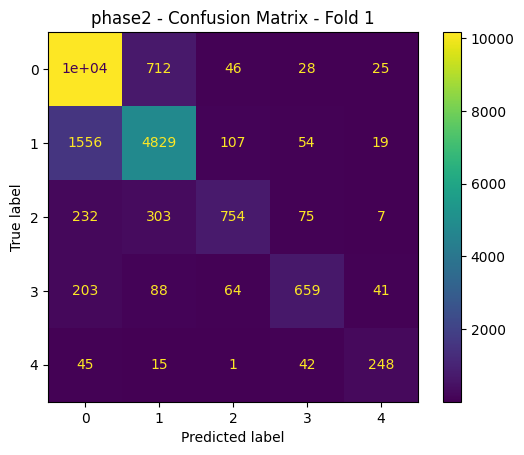


Fold 2:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     10978
           1       0.81      0.74      0.77      6565
           2       0.82      0.55      0.66      1371
           3       0.79      0.64      0.71      1055
           4       0.73      0.70      0.71       351

    accuracy                           0.82     20320
   macro avg       0.80      0.71      0.75     20320
weighted avg       0.82      0.82      0.82     20320



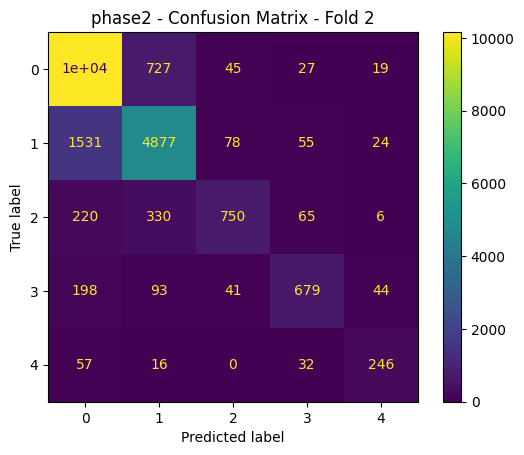


Fold 3:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     10977
           1       0.81      0.74      0.78      6566
           2       0.81      0.57      0.67      1371
           3       0.74      0.65      0.69      1055
           4       0.67      0.71      0.69       351

    accuracy                           0.82     20320
   macro avg       0.78      0.72      0.74     20320
weighted avg       0.82      0.82      0.82     20320



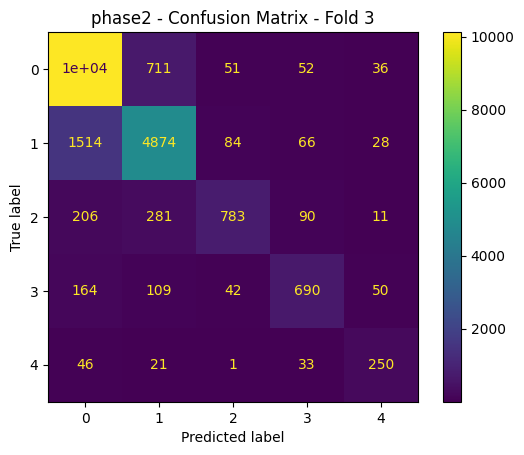


Fold 4:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     10977
           1       0.80      0.75      0.77      6566
           2       0.83      0.52      0.64      1371
           3       0.75      0.64      0.69      1054
           4       0.75      0.73      0.74       352

    accuracy                           0.82     20320
   macro avg       0.79      0.71      0.74     20320
weighted avg       0.82      0.82      0.82     20320



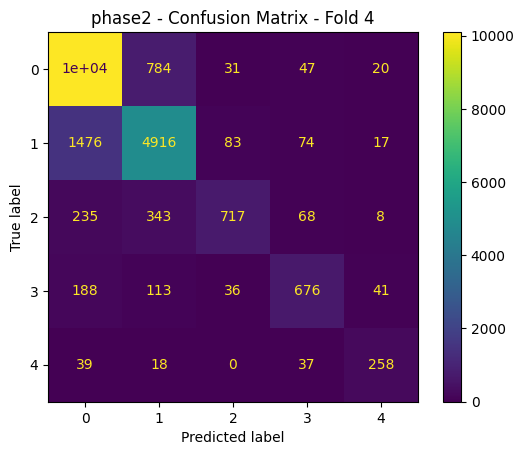


Fold 5:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     10977
           1       0.80      0.75      0.77      6565
           2       0.80      0.53      0.64      1372
           3       0.75      0.65      0.70      1054
           4       0.71      0.71      0.71       352

    accuracy                           0.82     20320
   macro avg       0.78      0.71      0.74     20320
weighted avg       0.82      0.82      0.82     20320



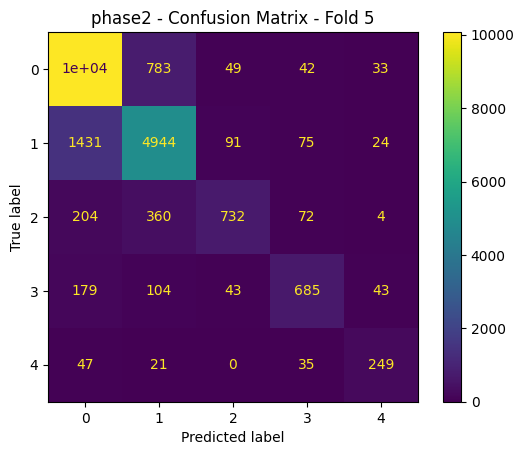

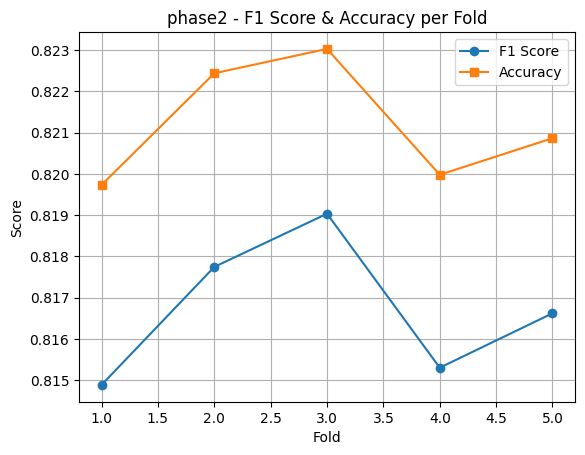


phase2 - Average F1 Score: 0.8167
phase2 - Average Accuracy: 0.8212
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94917 entries, 0 to 94916
Columns: 154 entries, user_id to label_encoded
dtypes: float64(142), int64(8), object(4)
memory usage: 111.5+ MB
None

--- Reliability Evaluation for phase3 ---

Fold 1:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     10348
           1       0.83      0.77      0.80      5951
           2       0.83      0.64      0.72      1337
           3       0.79      0.69      0.74      1011
           4       0.75      0.71      0.73       337

    accuracy                           0.84     18984
   macro avg       0.81      0.75      0.78     18984
weighted avg       0.84      0.84      0.84     18984



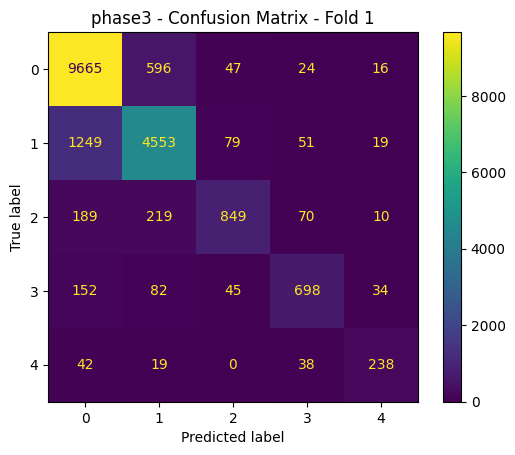


Fold 2:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     10348
           1       0.83      0.76      0.79      5951
           2       0.84      0.61      0.71      1337
           3       0.79      0.68      0.73      1011
           4       0.77      0.74      0.76       337

    accuracy                           0.84     18984
   macro avg       0.82      0.75      0.78     18984
weighted avg       0.84      0.84      0.84     18984



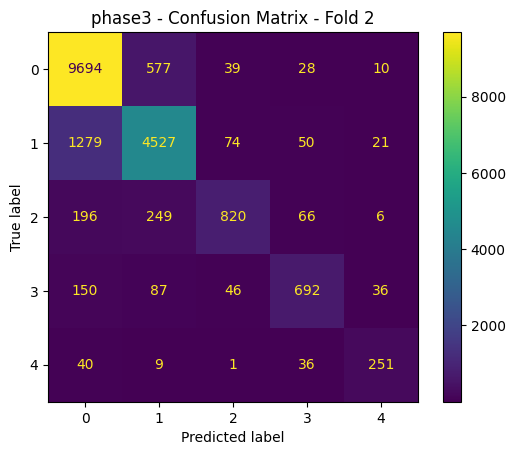


Fold 3:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     10348
           1       0.84      0.76      0.79      5950
           2       0.83      0.64      0.72      1338
           3       0.78      0.72      0.75      1010
           4       0.77      0.72      0.75       337

    accuracy                           0.84     18983
   macro avg       0.81      0.75      0.78     18983
weighted avg       0.84      0.84      0.84     18983



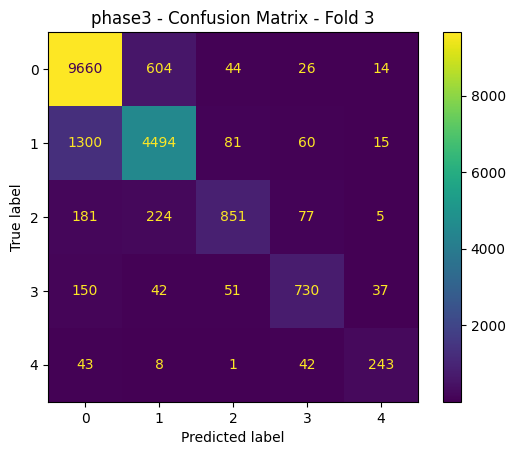


Fold 4:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     10348
           1       0.83      0.76      0.79      5950
           2       0.83      0.63      0.72      1337
           3       0.79      0.68      0.73      1011
           4       0.79      0.75      0.77       337

    accuracy                           0.84     18983
   macro avg       0.82      0.75      0.78     18983
weighted avg       0.84      0.84      0.84     18983



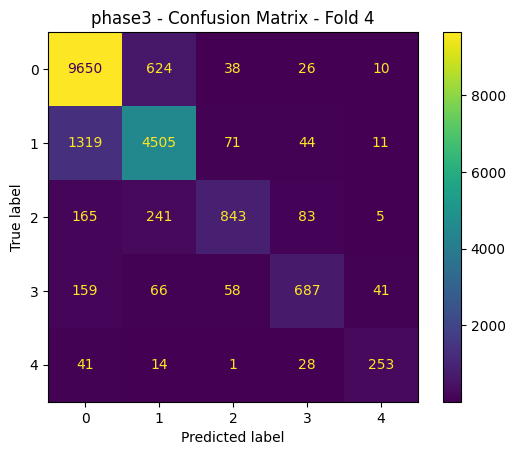


Fold 5:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     10348
           1       0.83      0.74      0.78      5950
           2       0.83      0.64      0.72      1337
           3       0.79      0.69      0.74      1011
           4       0.77      0.71      0.74       337

    accuracy                           0.84     18983
   macro avg       0.81      0.74      0.77     18983
weighted avg       0.84      0.84      0.83     18983



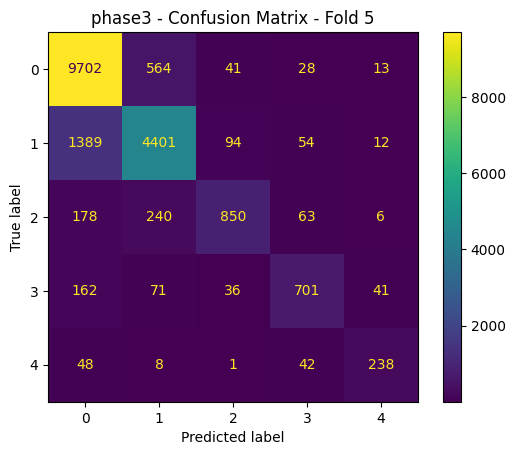

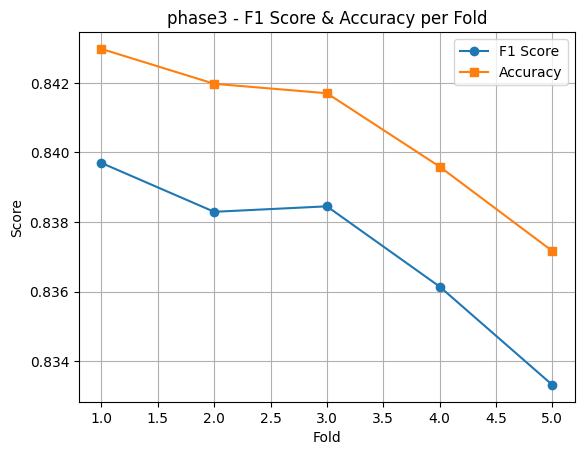


phase3 - Average F1 Score: 0.8372
phase3 - Average Accuracy: 0.8407
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83783 entries, 0 to 83782
Columns: 197 entries, user_id to label_encoded
dtypes: float64(185), int64(8), object(4)
memory usage: 125.9+ MB
None

--- Reliability Evaluation for phase4 ---

Fold 1:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      9192
           1       0.83      0.76      0.79      5043
           2       0.87      0.67      0.75      1252
           3       0.79      0.75      0.77       944
           4       0.80      0.83      0.82       326

    accuracy                           0.85     16757
   macro avg       0.83      0.79      0.81     16757
weighted avg       0.85      0.85      0.85     16757



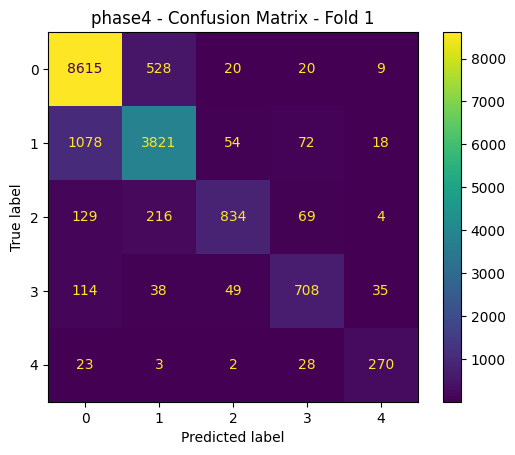


Fold 2:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      9192
           1       0.83      0.77      0.80      5043
           2       0.83      0.66      0.74      1252
           3       0.85      0.75      0.80       944
           4       0.81      0.82      0.81       326

    accuracy                           0.86     16757
   macro avg       0.84      0.79      0.81     16757
weighted avg       0.85      0.86      0.85     16757



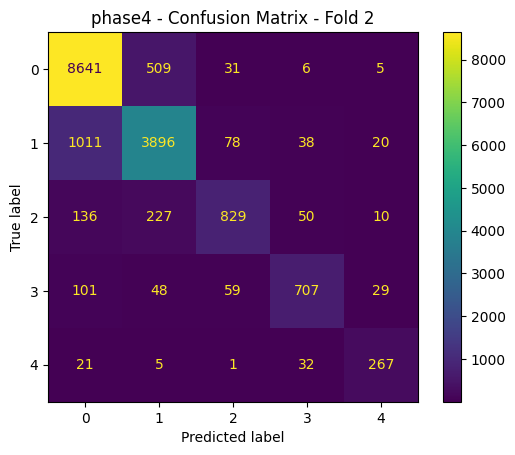


Fold 3:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      9192
           1       0.84      0.77      0.80      5042
           2       0.86      0.67      0.75      1253
           3       0.78      0.76      0.77       944
           4       0.82      0.77      0.79       326

    accuracy                           0.86     16757
   macro avg       0.83      0.78      0.80     16757
weighted avg       0.86      0.86      0.85     16757



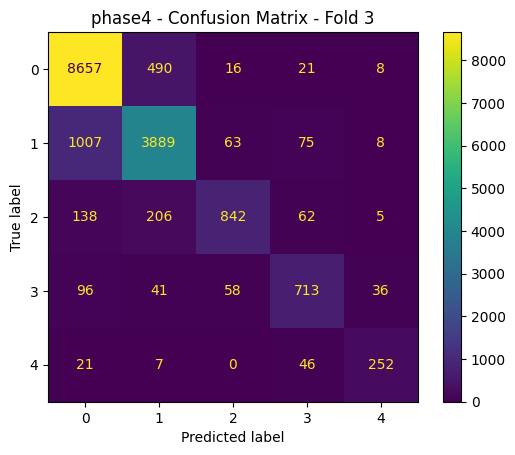


Fold 4:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      9191
           1       0.83      0.77      0.80      5043
           2       0.85      0.63      0.73      1252
           3       0.81      0.74      0.77       945
           4       0.79      0.77      0.78       325

    accuracy                           0.85     16756
   macro avg       0.83      0.77      0.80     16756
weighted avg       0.85      0.85      0.85     16756



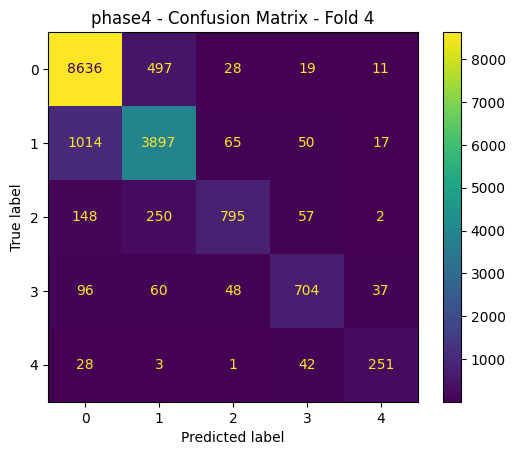


Fold 5:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      9191
           1       0.84      0.76      0.80      5043
           2       0.85      0.66      0.75      1252
           3       0.83      0.74      0.79       945
           4       0.81      0.76      0.79       325

    accuracy                           0.85     16756
   macro avg       0.84      0.77      0.80     16756
weighted avg       0.85      0.85      0.85     16756



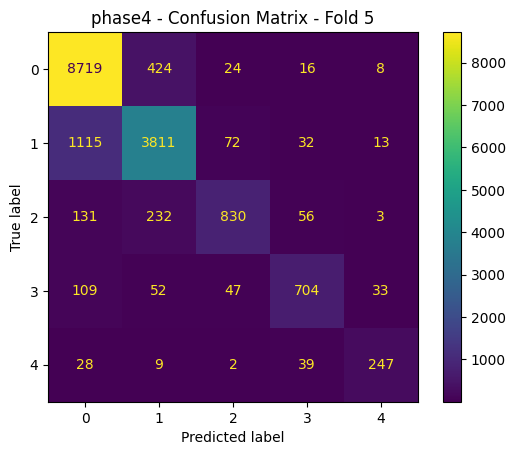

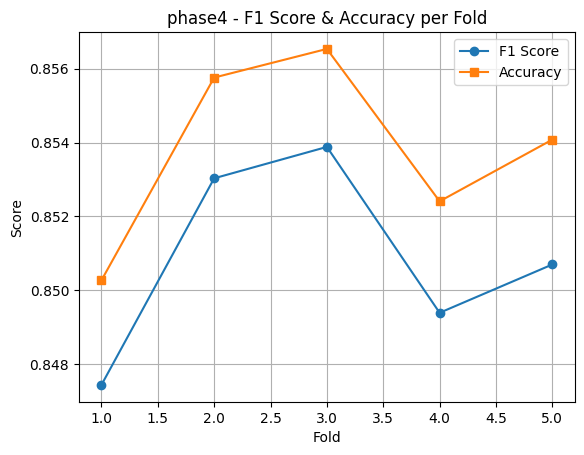


phase4 - Average F1 Score: 0.8509
phase4 - Average Accuracy: 0.8538


In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score
from catboost import CatBoostClassifier

def evaluate_reliability(phase, n_splits=5, catboost_params=None):
    # Load và tiền xử lý dữ liệu
    X, y = load_data(phase)
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    f1_scores = []
    acc_scores = []

    print(f"\n--- Reliability Evaluation for {phase} ---")
    fold = 1
    for train_idx, test_idx in skf.split(X_scaled, y):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = CatBoostClassifier(verbose=0, random_seed=42, **(catboost_params or {}))
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        
        f1 = report['weighted avg']['f1-score']
        acc = accuracy_score(y_test, y_pred)

        f1_scores.append(f1)
        acc_scores.append(acc)

        print(f"\nFold {fold}:")
        print(classification_report(y_test, y_pred, zero_division=0))
        
        # Vẽ confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.title(f"{phase} - Confusion Matrix - Fold {fold}")
        plt.show()
        
        fold += 1

    # Vẽ biểu đồ đường F1 và Accuracy qua từng fold
    plt.figure()
    plt.plot(range(1, n_splits+1), f1_scores, marker='o', label='F1 Score')
    plt.plot(range(1, n_splits+1), acc_scores, marker='s', label='Accuracy')
    plt.xlabel("Fold")
    plt.ylabel("Score")
    plt.title(f"{phase} - F1 Score & Accuracy per Fold")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\n{phase} - Average F1 Score: {np.mean(f1_scores):.4f}")
    print(f"{phase} - Average Accuracy: {np.mean(acc_scores):.4f}")

    return f1_scores, acc_scores

# Chạy cho từng phase
for phase in ['phase1', 'phase2', 'phase3', 'phase4']:
    evaluate_reliability(phase, catboost_params=catboost_config)